<h1>Credit Risk Prediciton</h1>


## **1. Understanding the data** 

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

In [2]:
#Importing the data
df = pd.read_excel("german_credit_data.xlsx")

In [3]:
# check dataframe df_credit
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
# check data size and Missings values,type of data 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB
None


In [5]:
#Looking unique values
print(df.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [6]:
print(df.describe())

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


Findings: With this basic data fummary, we can see that 
- The data size is: 1000 (smaples) X 10 (properties).
- Among the 10 properties, Risk is the target variable (dependent variable) (we need to predict with a model)
- There are 4 avrables with int64 type, and 6 with object(string) type.
- We can see the range of each variables the most value is 921 from Credit amount, and the least is a binary form Sex, and Risk. 
- We can also see that **Saving accounts** and **Checking account** have missing values since their "non-null" is less than the number of samples. 
- Job should have a categorical type

##  Calculate missing values and the percentage 

                  Num   Pct
Age                 0   0.0
Sex                 0   0.0
Job                 0   0.0
Housing             0   0.0
Saving accounts   183  18.3
Checking account  394  39.4
Credit amount       0   0.0
Duration            0   0.0
Purpose             0   0.0
Risk                0   0.0


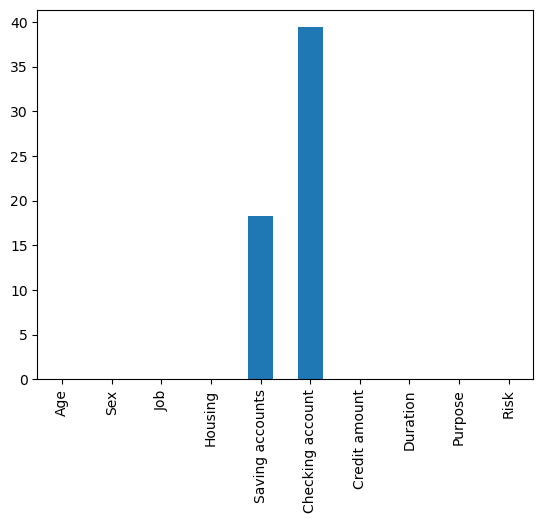

In [7]:
#Get the numbers of missing values in each column
missing = df.isnull().sum()

#Get the percentage of missing values in each column
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)

data_missing = pd.concat([missing, missing_pct], axis=1)
data_missing.columns = ["Num", "Pct"]
print(data_missing)

#Plot missing values
data_missing['Pct'].plot(kind= "bar")
plt.show()

<b>The result shows there are 183 missing values in Saving accounts and 194 misisng values in Checking account <b>
<b> The percent age of msisng vlaues are 18.3 and 39.4 respectively. 
    We will deal with the missing values later

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


## 2. Data Attribute Analysis with EDA

<h4>  Looking through <b>Object</b> variables and their distribuition</h4>

In [9]:
# Distribution graphs (histogram/bar graph) of object column 
def plotObjColumnDistribution(df, nGraphShown, nGraphPerRow):
    print(f'=== Distribution of features with object values ===')
    
    df = df[[col for col in df.select_dtypes(["object", "category"])]] # pick columns with object type
    
    nRow, nCol = df.shape
    columnNames = list(df)
    print(columnNames)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 5 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
 
    for i, col in enumerate(columnNames):
        # Plot distribution 
        plt.subplot(int(nGraphRow),nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
        
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
        
    # Show the plot
    plt.tight_layout()
    plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


=== Distribution of features with object values ===
['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


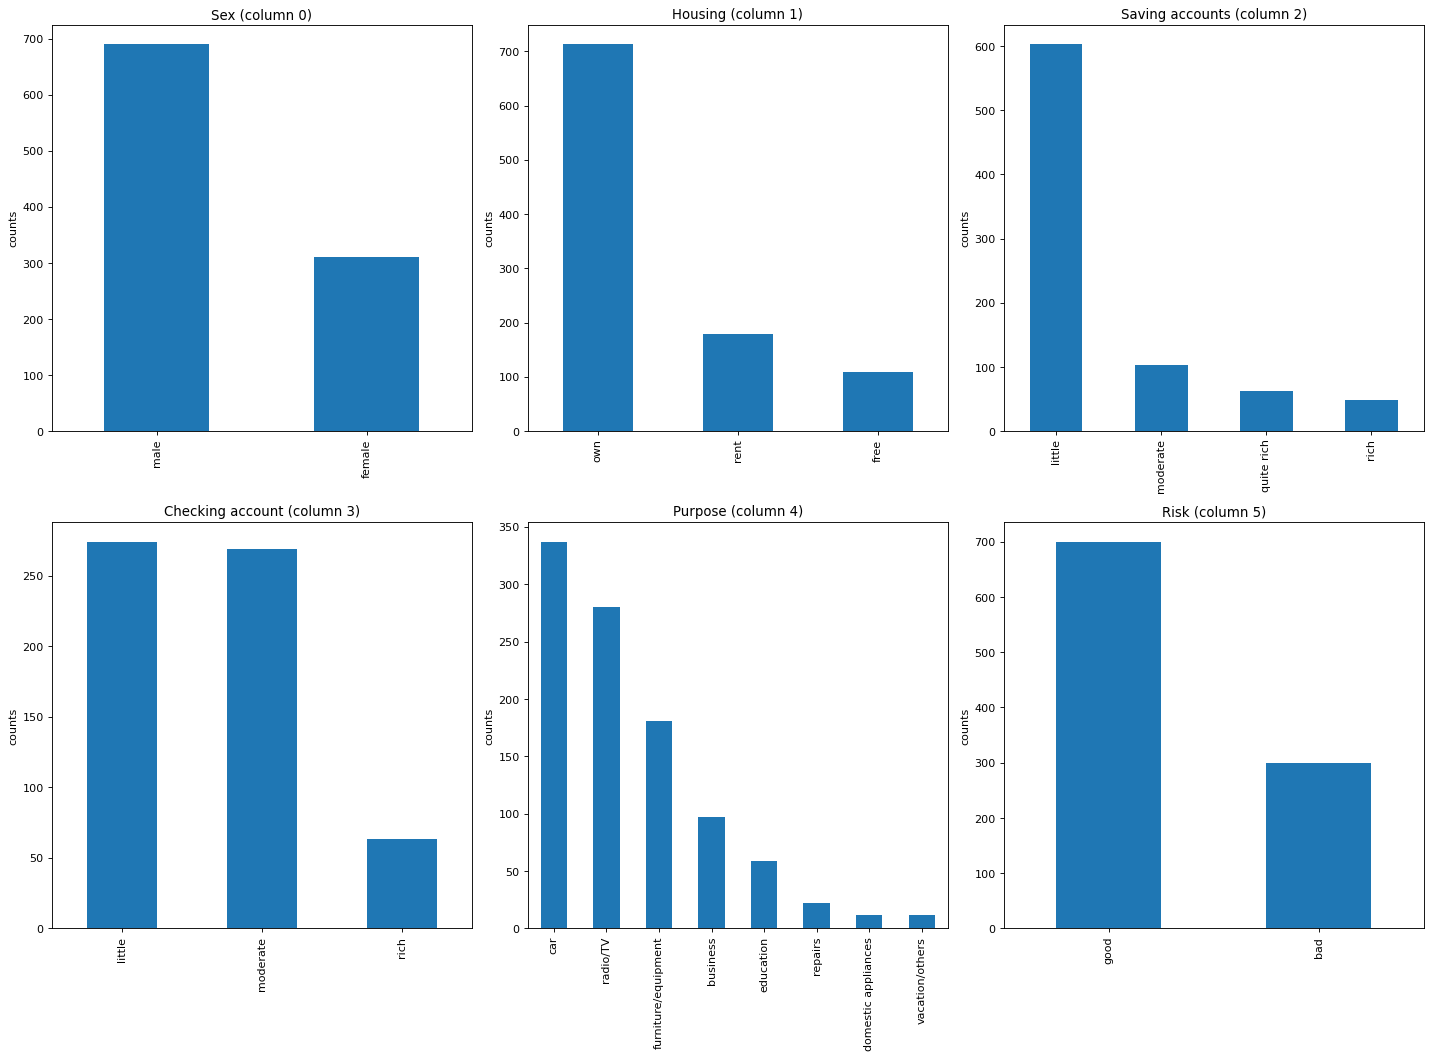

In [11]:
plotObjColumnDistribution(df, 10, 3)

**Findings**: 
1. Among the 6 catagorical attributes. The value are distributed **Unevenly** most are **Skewed** to the left. It may affact the prediction later.
2. The targeted dependent varaible **Risk** is **imblanced** the ratio is 700:300 between "good" and "bad" 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


<h4>  Looking through numerial variables and their distribuition</h4>

In [13]:
# Distribution graphs (histogram/bar graph) of column data with (num)
def plotNumColumnDistribution(df,nGraphPerRow):
    print(f'=== Distribution of features with number values ===')
    
    df = df[[col for col in df.select_dtypes(np.number)]] # pick columns with bumber type
    
    nRow, nCol = df.shape
    columnNames = list(df)
    print(columnNames)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 3 * int(nGraphRow)))
 
    for i, col in enumerate(columnNames):
        # Plot distribution 
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        sns.distplot(df[col], color='blue')
        plt.title(f'Distribution of {col}')
    # Show the plot
    plt.tight_layout()
    plt.show()

=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration']


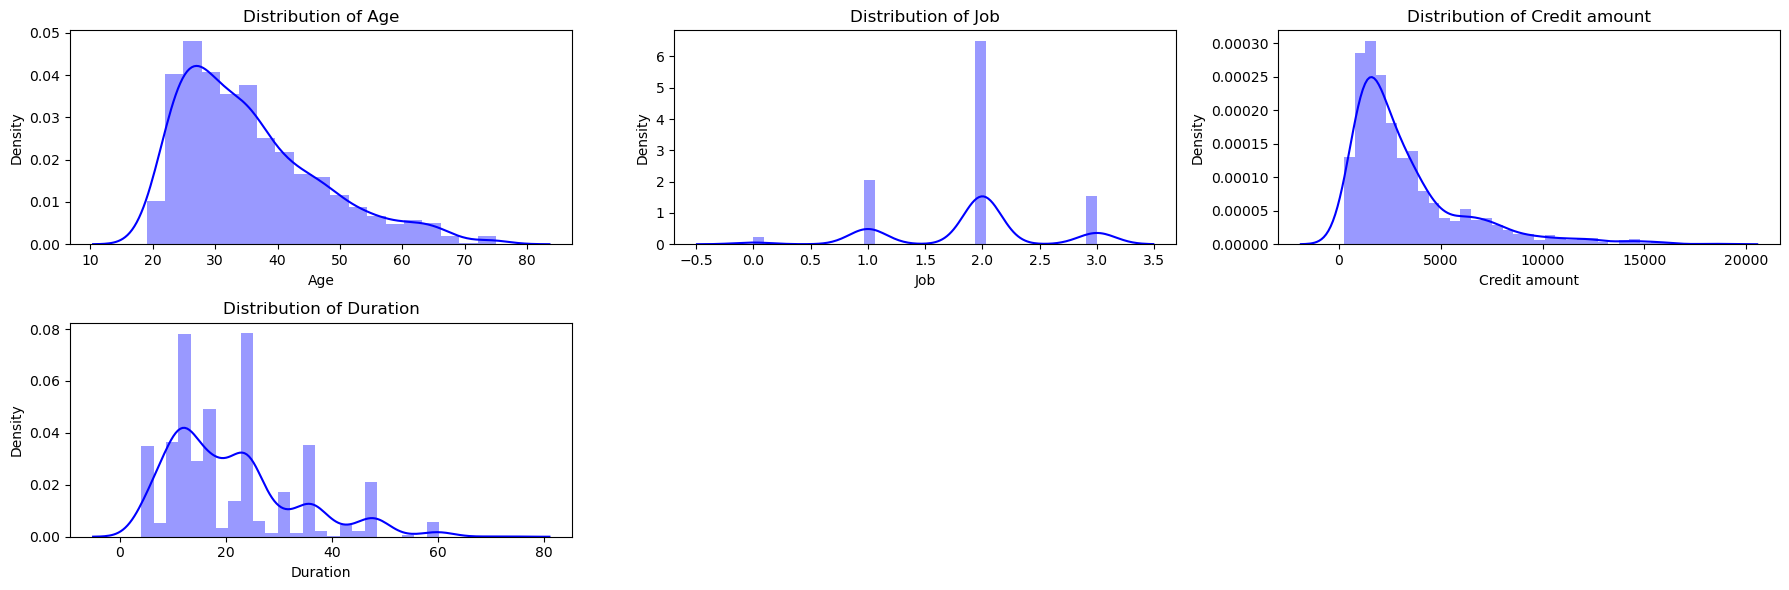

In [14]:
plotNumColumnDistribution(df, 3)

**Findings**: 

Among the 3 numerial attributes. The two values Age and Credit amount are distributed Unevenly and are Skewed to the left. It may affact the prediction later.


In [15]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features


#### Check numerical varibles with Risk

In [16]:
# Distribution graphs (histogram/bar graph) of Numerical columns related with dependent variable risk
def plotRiskNumColumnDistribution(df, nGraphPerRow):
    
    df2 = df[[col for col in df.select_dtypes(np.number)]] # pick columns with number type
    
    nRow, nCol = df2.shape
    columnNames = list(df2)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    fig, axes = plt.subplots(int(nGraphRow), nGraphPerRow, figsize=(15, 8))
    axes = axes.ravel()

    for ax in axes:
        ax.set_axis_off()
    
    for i in range(len(columnNames)):
        #print (df[df["Risk"]=="No"][columnNames[i]].head())
        axes[i].hist(df[df["Risk"]=="good"][columnNames[i]], alpha=0.5, color='blue',  label='No')
        axes[i].hist(df[df["Risk"]=="bad"][columnNames[i]], alpha=0.5, color='red',  label='Yes')    
        
        axes[i].legend(prop={'size': 10})
        axes[i].set_title(str(columnNames[i]))
        axes[i].set_axis_on()
 
    fig.tight_layout()
    plt.show()

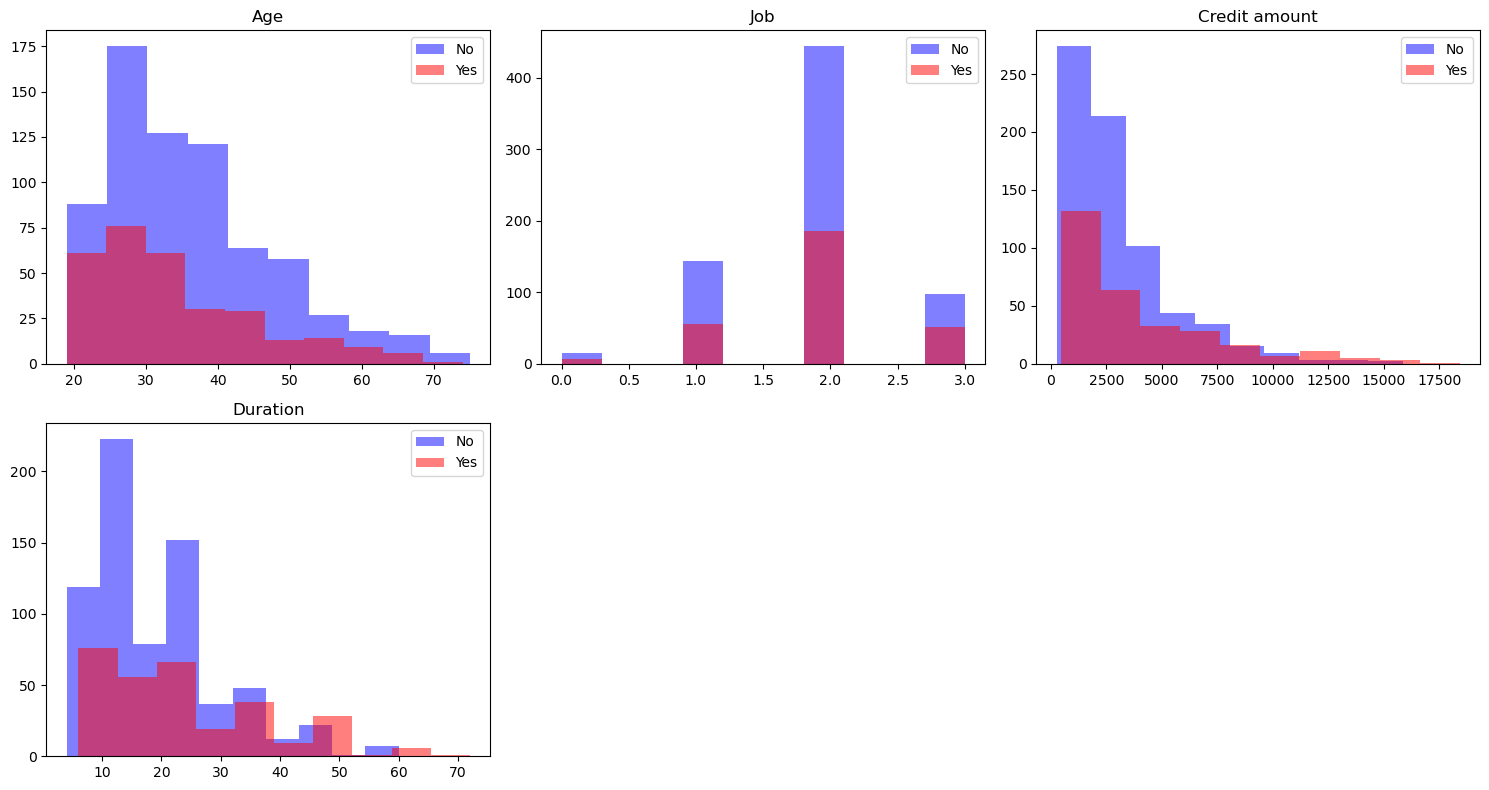

In [17]:
plotRiskNumColumnDistribution(df, 3)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


**Findings**: 

Among the 3 numerial attributes. The two values Age and Credit amount are distributed Unevenly and are Skewed to the left. The Risk is propotionally with the distribution. It may affact the prediction later.


###  Check categorical variables against Risk

In [19]:
# Distribution graphs (histogram/bar graph) of object column 
def plotRiskObjColumnDistribution(df, nGraphPerRow):
    print(f'=== Distribution of features with object values ===')
    df2 = df[[col for col in df.select_dtypes(["object", "category"])]] # pick columns with object type
    nRow, nCol = df2.shape
    #print(df2)

    columnNames = list(df2)
    #print(columnNames)

    columnNames = [item for item in columnNames if item != "Risk"]
    print(columnNames)
    
    nGraphRow = int(len(columnNames)/ nGraphPerRow) + 1
    #print(nGraphRow)
    figsize = (6 * nGraphPerRow, 3 * nGraphRow)
    for i, col in enumerate(columnNames):
        df_pct = df2.groupby([columnNames[i],'Risk'])['Risk'].count()/df2.groupby([columnNames[i]])['Risk'].count()
        #df_pct = df2.groupby([columnNames[i],'Risk'])['Risk'].count()
        #print(df_pct)
        
        #plt.subplot(nGraphRow, nGraphPerRow, i+1)
        #df_pct.plot.bar(stacked=True)
        df_pct.unstack().plot.bar(stacked=True)
        #sns.pairplot(df, hue="Risk")
        plt.ylabel('counts percent %')
        plt.title(f'Risk distribution with {columnNames[i]}')
    plt.show()

=== Distribution of features with object values ===
['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


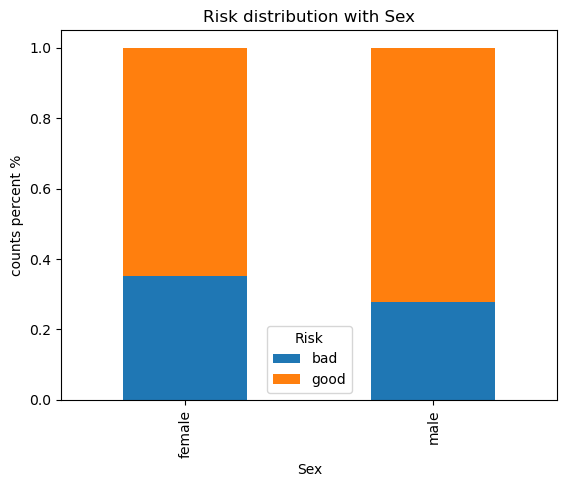

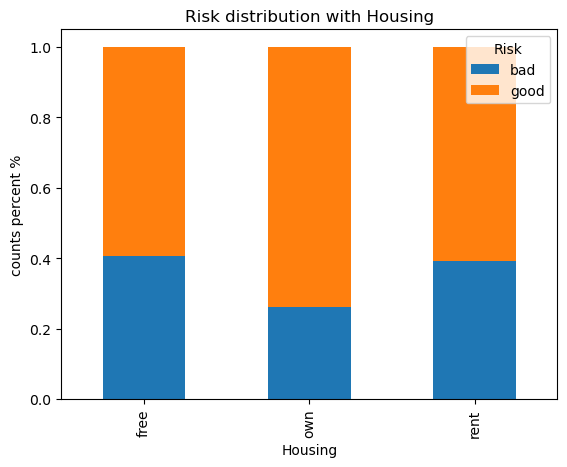

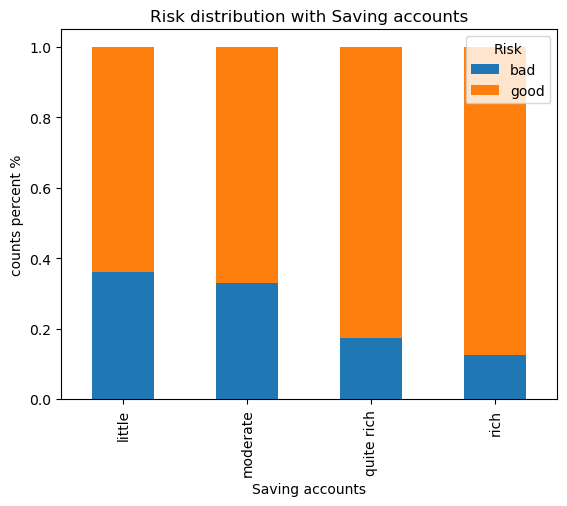

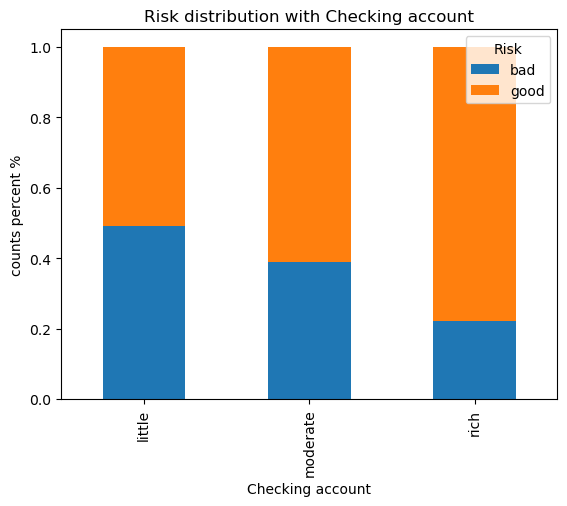

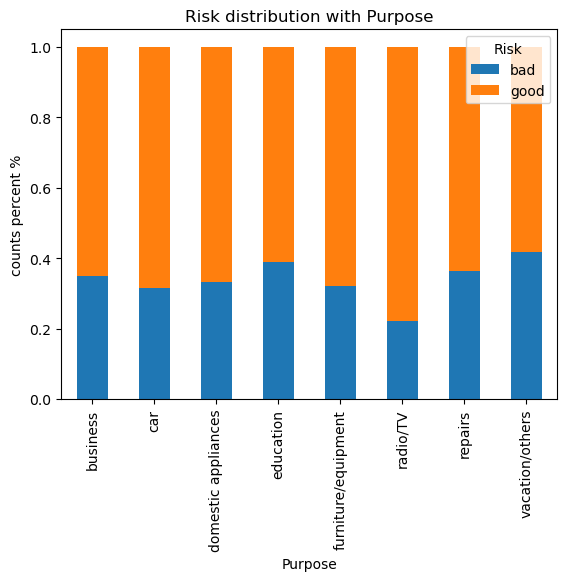

In [20]:
plotRiskObjColumnDistribution(df, 2)

## ** Data Preprocessing** <a id="preprocessing"></a> <br>
We need to produce a new dataset (df_credit) for prediction model construction
1. We need to convert the target varaible **Risk** into a numerical.
2. We need to split df_credit into predict varible and dependent varaible.
2. we do some individual varaible **transforamtion**, **fill missing data**  

### prepare for target variable **Risk**

In [21]:
#Importing the data
df = pd.read_excel("german_credit_data.xlsx")
# It is a good idea and coomon practice you do data manpulation on a new dataframe and keep the origianl untouched
df_credit = df

In [22]:
#Change Risk column (target variable) into numerical with 0 and 1 values
df_y = df[['Risk']]
df_y['Risk'] = np.where(df_y.loc[ : , 'Risk']=='good', 0, 1)
df_y.head()
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Risk    1000 non-null   int32
dtypes: int32(1)
memory usage: 4.0 KB


### prepare for predictor variable 

In [23]:
df_credit = df_credit.drop(["Risk"], axis=1)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


### Deal with missing values

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object


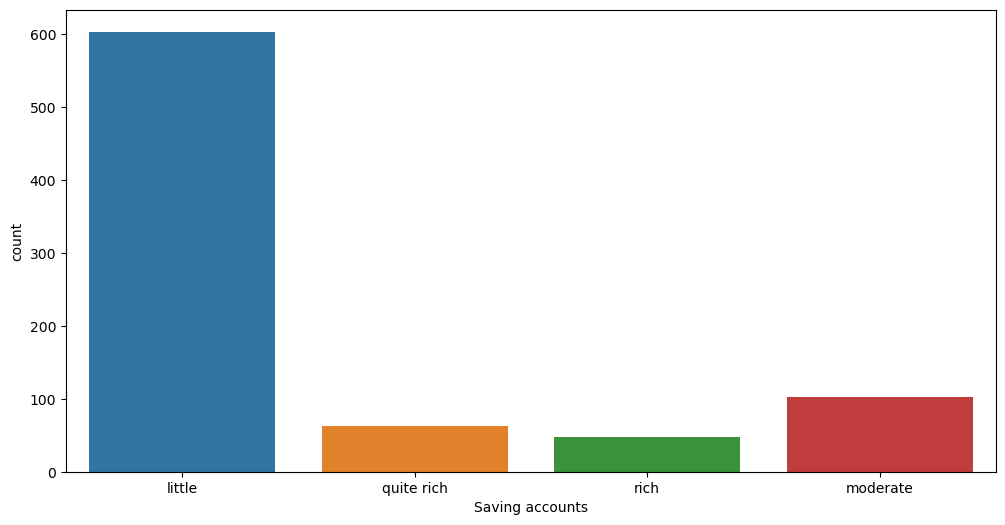

In [24]:
# Saving accounts has 183 missing values and Checking account 394 misisng values 
# check Saving accounts
print(df_credit['Saving accounts'].describe())

plt.figure(figsize=(12,6))
sns.countplot(x='Saving accounts',data = df_credit)

plt.show()

#### From above descritipn and plot, we can see that the value of the **saving account** distribution and **Risk** distribution over the saving account:
1. majority is little, (603/817), the easist solusion is aasign all the missing value as "little"
2. The best solusion is using current distribution to assing randomly generated value ot keep the distribution un changed.

In [25]:
# Assign missing vlaue with little

df_credit['Saving accounts'].fillna('little', inplace = True)
df_credit['Saving accounts'].describe()


count       1000
unique         4
top       little
freq         786
Name: Saving accounts, dtype: object

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object


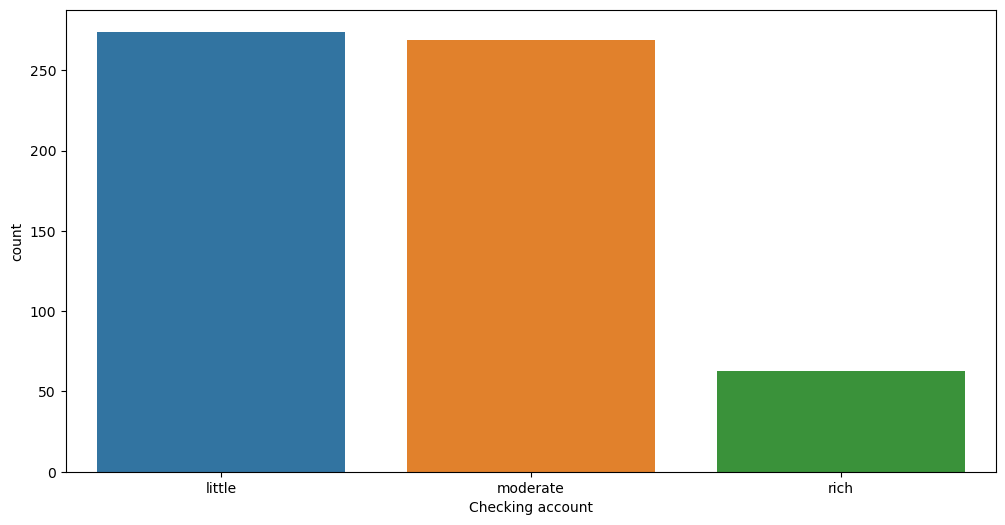

In [26]:
# Saving accounts has 183 missing values and Checking account 194 misisng values 
# check Saving accounts
print(df_credit['Checking account'].describe())

plt.figure(figsize=(12,6))
sns.countplot(x='Checking account',data=df_credit)

plt.show()

**Findings**: 
1. We can see that the current distribution is pretty even between **Little** and **Moderate**; and only small amount has value of **rich**
2. The targeted dependent varaible **Risk** for the three category distribution are vary a lot. 

Among the many fill misiing value methods, one of them may suitable for this situation. **that is create a new catergory value** like *NoInfo* it self is valualbe since the number of missing value is almost the same quntity with any other two most couurences. 274 for littel and 194 missing values. 

<AxesSubplot:xlabel='Checking account', ylabel='count'>

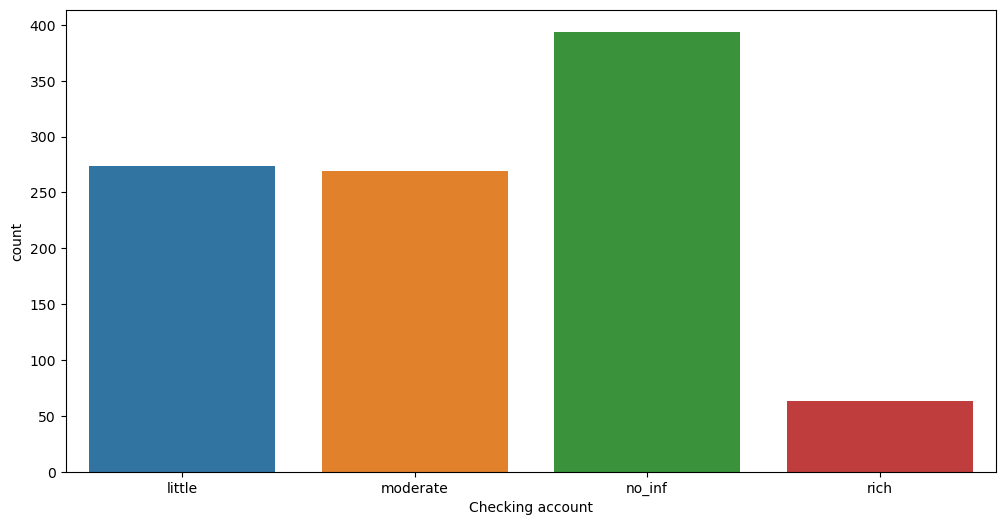

In [27]:
# fill the missing value with a category called "No_info"
df_credit['Checking account'].fillna('no_inf', inplace=True)
df_credit['Checking account'].head()
#df_credit['Checking account'].describe()
plt.figure(figsize=(12,6))
sns.countplot(x='Checking account',data=df_credit)

### Deal with distributuion was extreamly skewed varaibles

The numerical varaibles are all skewed to the left. They will affact most of ML models.
We need to normalise them by performming a **log transformation** before using these features in our modelling.

=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration']


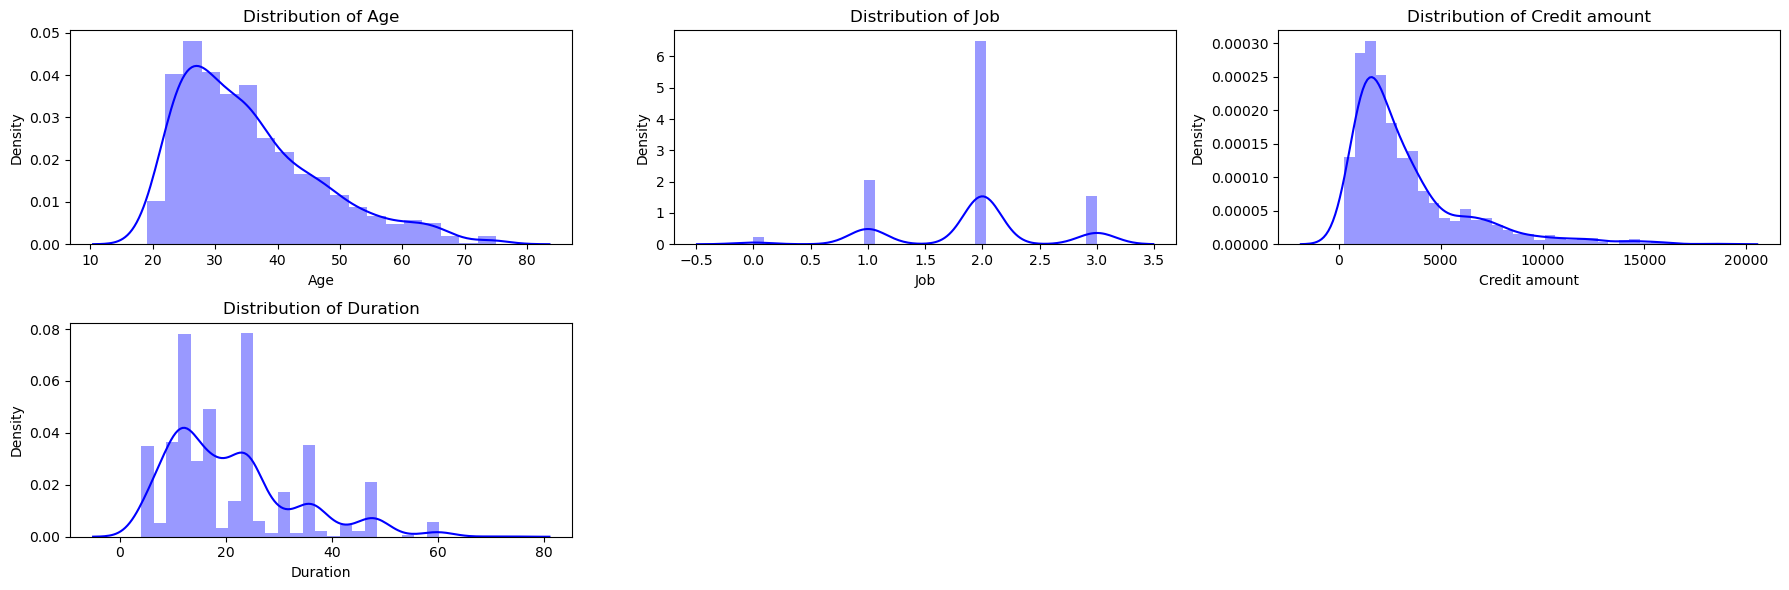

In [28]:
plotNumColumnDistribution(df, 3)

In [29]:
# Log transform function
def log_transform(data, to_log):
    X = data.copy()
    for item in to_log:
        # Add 1 to the data to prevent infinity values
        X[item] = np.log(1+X[item])
    return X

In [30]:
# log transfer
df_credit = log_transform(df_credit, ['Credit amount', 'Duration'])

=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration']


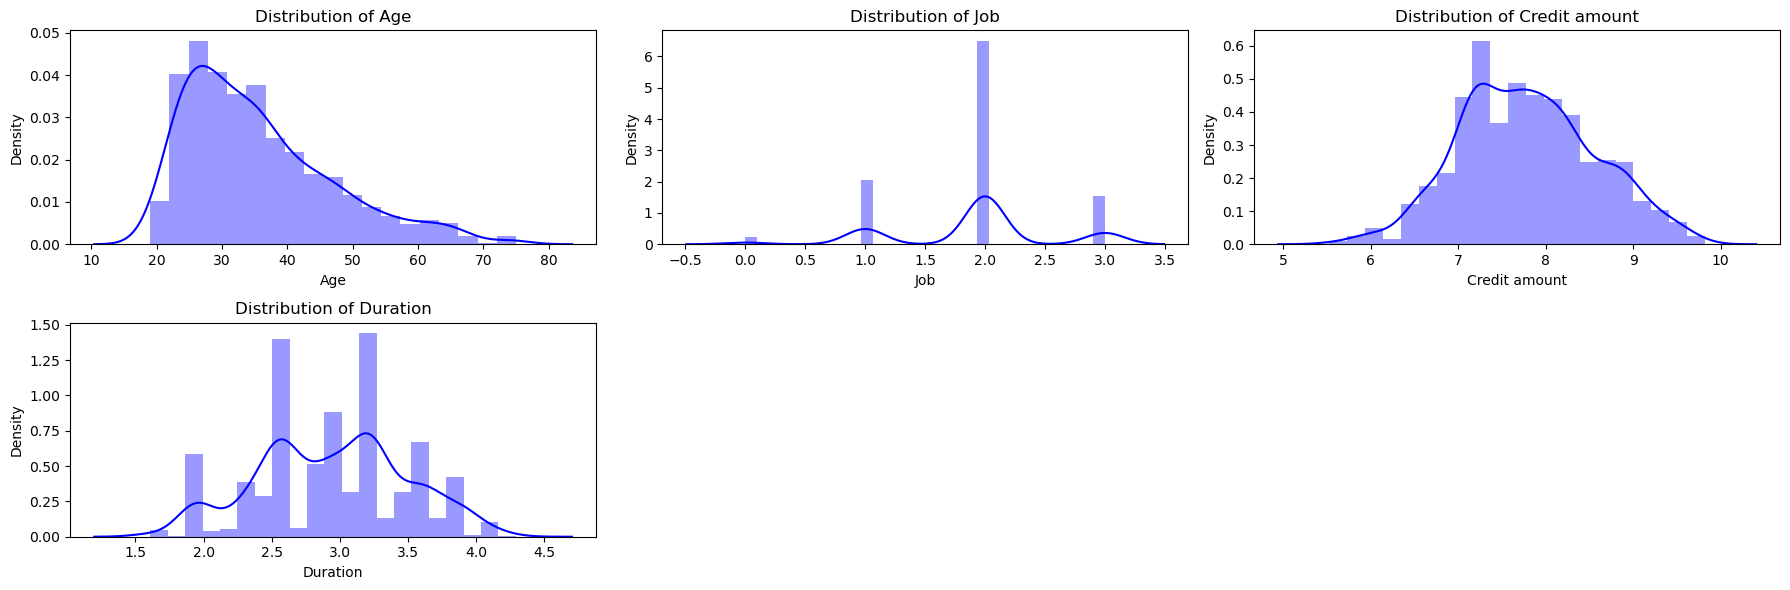

In [31]:
# check the result
plotNumColumnDistribution(df_credit, 3)

### Transfer all object and category variables into numberical

We need to do this for 2 reasons:
1. most of the prediction models need predictor to be numberical
2. for correclation analysis we need attributres ot be numberical.

In [32]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns = categorical_columns, dummy_na = nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df

In [33]:
# do transformation on df-credit
df_credit_T = one_hot_encoder(df_credit)
print(df_credit_T.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   int64  
 1   Job                          1000 non-null   int64  
 2   Credit amount                1000 non-null   float64
 3   Duration                     1000 non-null   float64
 4   Sex_female                   1000 non-null   uint8  
 5   Sex_male                     1000 non-null   uint8  
 6   Housing_free                 1000 non-null   uint8  
 7   Housing_own                  1000 non-null   uint8  
 8   Housing_rent                 1000 non-null   uint8  
 9   Saving accounts_little       1000 non-null   uint8  
 10  Saving accounts_moderate     1000 non-null   uint8  
 11  Saving accounts_quite rich   1000 non-null   uint8  
 12  Saving accounts_rich         1000 non-null   uint8  
 13  Checking account_li

After all the df_credit change into **numerical** we can see the realtion between therm with the target variable **Risk**. We need to concat them together to form a training dataset.

In [34]:
#concat the df_credit with df_y 
data_train = pd.concat([df_credit_T, df_y], axis=1)
data_train.head()


,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,67,2,7.064759,1.945910,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,22,2,8.691483,3.891820,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,49,1,7.648263,2.564949,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,45,2,8.972464,3.761200,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,53,2,8.491055,3.218876,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little', 'Saving accounts_moderate', 'Saving accounts_quite rich', 'Saving accounts_rich', 'Checking account_little', 'Checking account_moderate', 'Checking account_no_inf', 'Checking account_rich', 'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others', 'Risk']


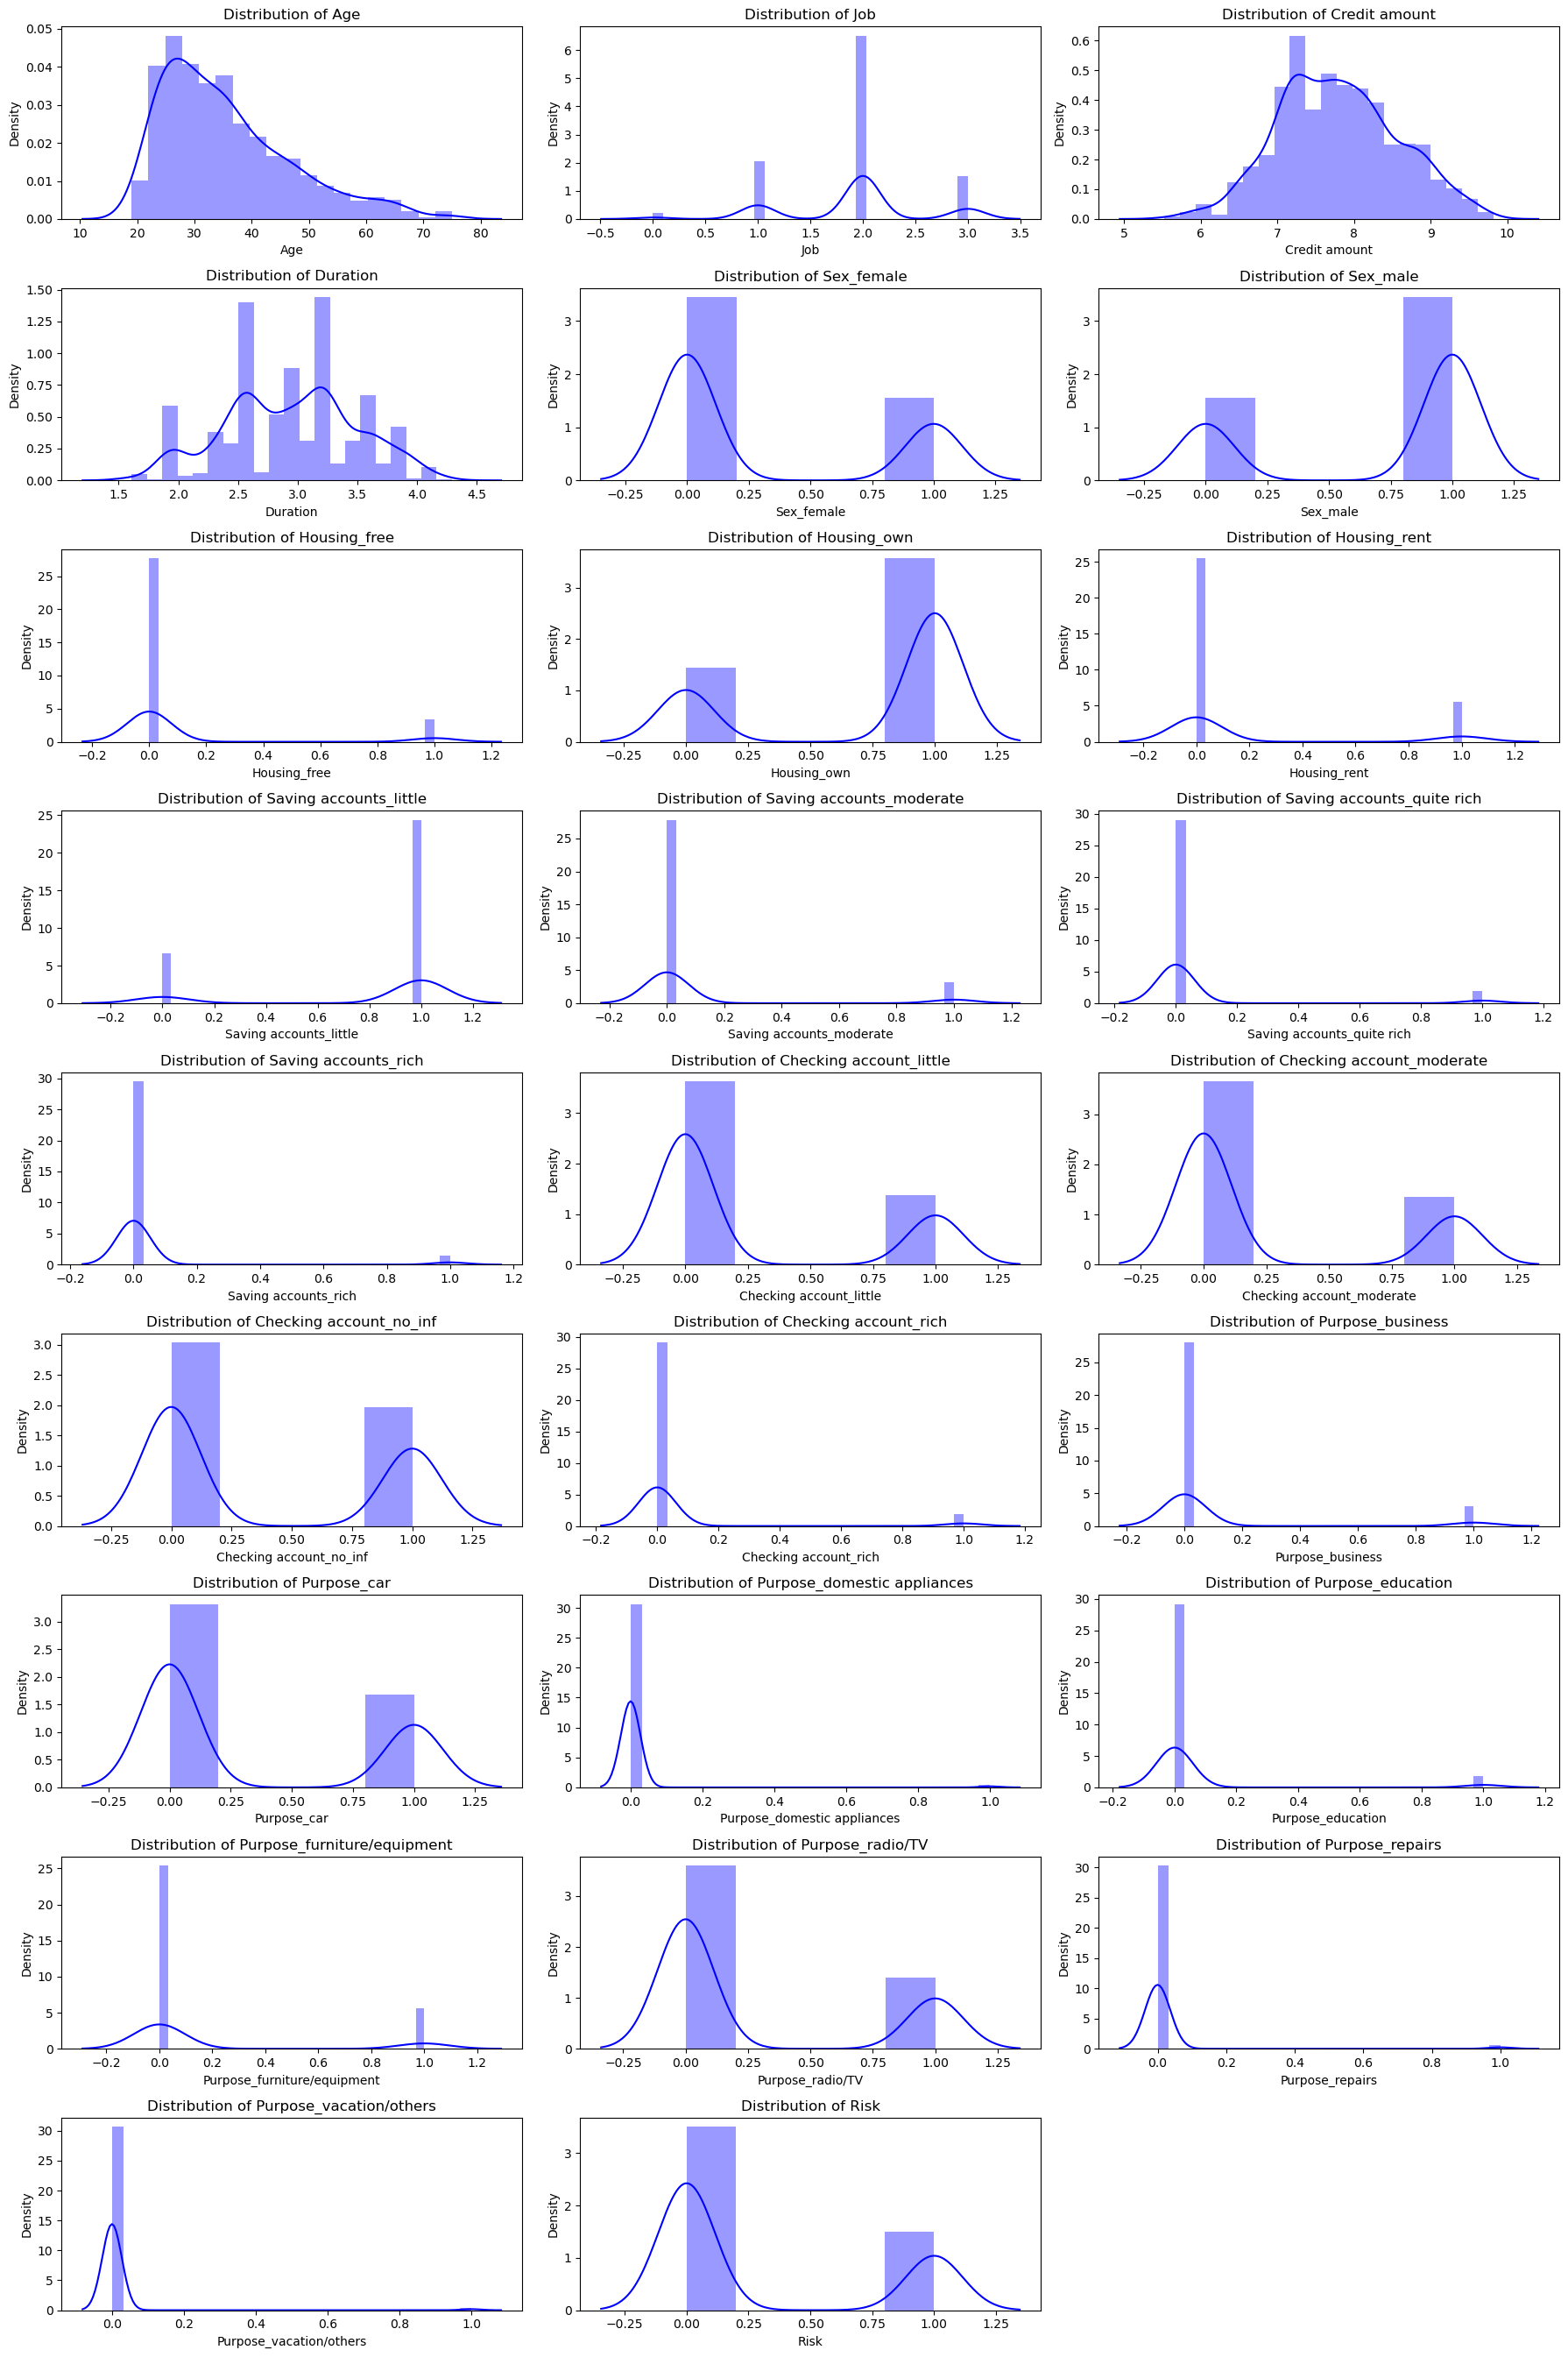

In [35]:
# check distributions
plotNumColumnDistribution(data_train, 3)

After this basic data preprocessing, we have produced a new data set ready for to be used ofr our model constrcution. 
1. df_credit_T: Dataset only comtains independent varaibles after normalisation
2. df_y: dataset only has the dependent varaible "Risk" and only has 0 and 1 
3. data_train: concation of the two

We are ready to build our prediction models. We also need to assess our models performance. That is the nest action.

## Prediciton Model Construction and Evaluation** <a id="Modelling"></a> <br>

In [36]:
# liberary loading
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [37]:
X = df_credit_T
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Modle LR has: 0.716 accuracy
Modle KNN has: 0.660 accuracy
Modle DT has: 0.652 accuracy
Modle NB has: 0.648 accuracy
Modle RF has: 0.752 accuracy
Modle SVM has: 0.724 accuracy
Modle XGB has: 0.744 accuracy


<Figure size 1100x600 with 0 Axes>

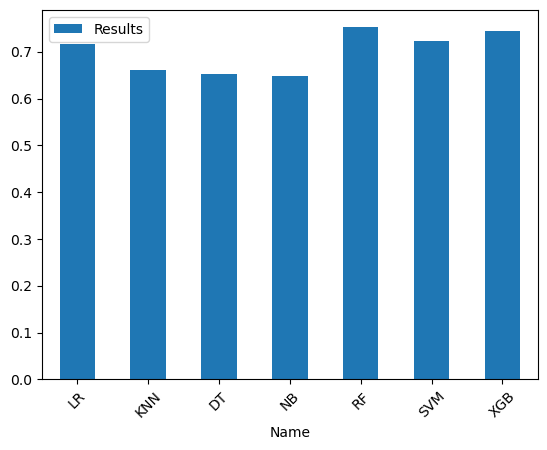

In [38]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        pre_results = model.predict(X_test)
        model_acc = accuracy_score(y_test, pre_results)
        names.append(name)
        results.append(model_acc)
        msg = "Modle %s has: %0.3f accuracy" % (name, model_acc)
        print(msg)      

# boxplot algorithm comparison
results_df = pd.DataFrame({'Name':names, 'Results':results})
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')

results_df.plot.bar(x='Name',rot=45)

plt.show()

We can see how easy the model can be constructed and how the results can be predicted.
However, we dont know the results are best or not. This can be conformed or improved after the models fine tune.

**Findings:**

    - all models have pretty low accuracy
    - some models perform a liitle better than others

## ** Prediciton model fine tune**

## **6.1 Features selection** <a id="Correlation"></a> <br>

###  Correlation Analysis

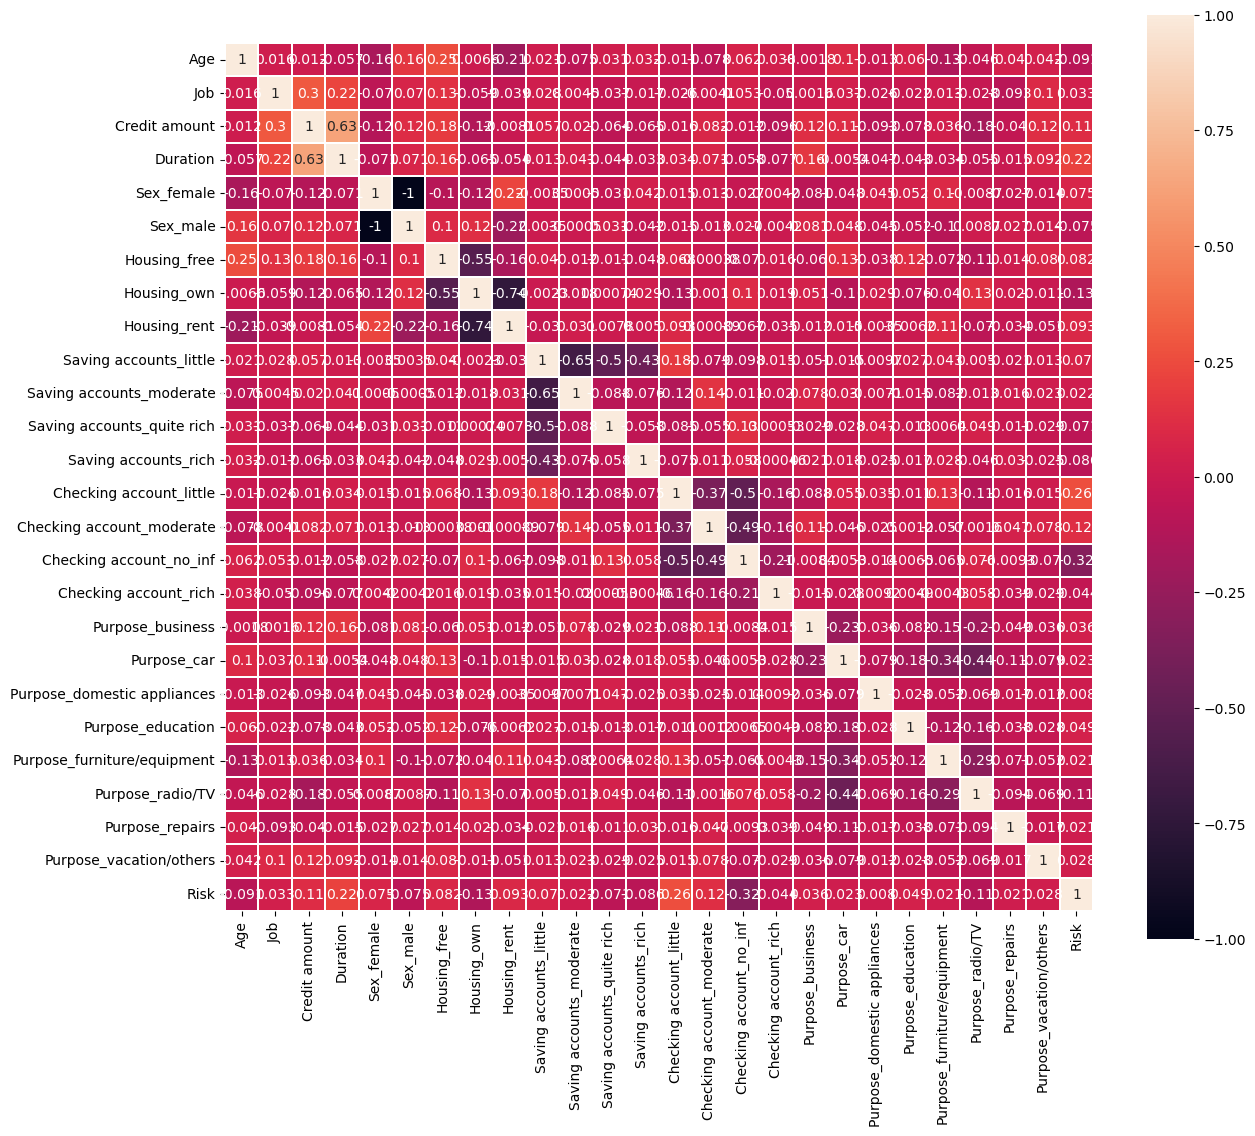

In [39]:
# Correlation analysis of on the data_train rather than df_credit_T
# Because we want see the correlation with Risk 
plt.figure(figsize=(14,12))
sns.heatmap(data_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

Above correlation heatmap shows **the correlations among the variables**. 
Apart from the correlations between varibles, Our attention should focuse on the correlation between the predictor varibles and also shows the coorelations between predictors and the target variable **Risk**.

**Findings:**
1. The most positive correlation with **Risk** are: **Checking account_little, Duration, saving account little, house_rent and Credit_amount**. 
2. **Checking account_no_info** has a negitive on the **Risk**.
3. Correlation analysis provides basic inforamtion on the coonections between predictors and the target varaible.

#### The importance of the independent (predictors) variable with target variable in order

In [40]:
# show the most influenced variables
var_importance = data_train.corrwith(data_train["Risk"]).abs()
var_importance.sort_values(ascending=False)

Risk                           1.000000
Checking account_no_inf        0.322436
Checking account_little        0.258333
Duration                       0.215280
Housing_own                    0.134589
Checking account_moderate      0.119581
Credit amount                  0.109588
Purpose_radio/TV               0.106922
Housing_rent                   0.092785
Age                            0.091127
Saving accounts_rich           0.085749
Housing_free                   0.081556
Sex_female                     0.075493
Sex_male                       0.075493
Saving accounts_quite rich     0.070954
Saving accounts_little         0.070234
Purpose_education              0.049085
Checking account_rich          0.044009
Purpose_business               0.036129
Job                            0.032735
Purpose_vacation/others        0.028058
Purpose_car                    0.022621
Saving accounts_moderate       0.022255
Purpose_furniture/equipment    0.020971
Purpose_repairs                0.020828


**Findings:**

With this order we can decide hwo many and which parameters to use.

In [41]:
var_importance.count()

26

### Elbow Method for Clustring using K-means

In [42]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_credit_T)
    distortions.append(kmeanModel.inertia_)

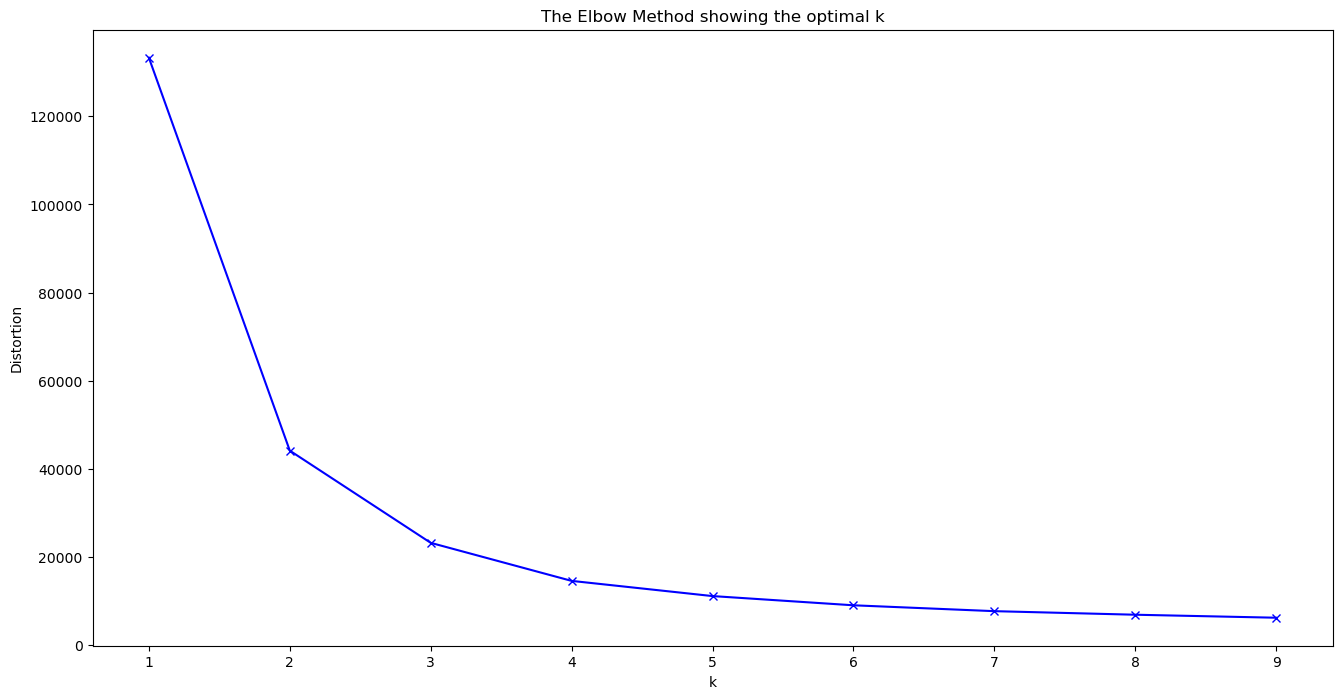

In [43]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

findings:

    we see that cluster is forming an elbow at point 3.

###  PCA Analysis 

With PCA, we can also find **the number of features required** to explain the variance in all candidate features.

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n=24
columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 
         'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12','PCA_13','PCA_14',
         'PCA_15', 'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20', 'PCA_21', 
         'PCA_22', 'PCA_23', 'PCA_24']

PCA is effected by scale. So we need to scale the features in our data before applying PCA. The scale is done by using **StandardScaler**. It can standarlize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 


In [45]:
# Standardizing the features
# df_credit_T is the origianl dataset applied 
X = StandardScaler().fit_transform(df_credit_T)


#### Using PCA **.fit_transform()** to find PCs

In [46]:
# Create the PCA instance and fit and transform the data with pca
pca = PCA(n_components=n,svd_solver='full')
pc = pca.fit_transform(X)
df_pc = pd.DataFrame(pc, columns=columns)
df_pc.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24
0,-0.556447,-1.259145,-2.426284,0.954262,1.238742,0.308569,-0.530180,0.514255,0.996348,-0.403911,...,0.037920,0.694974,-1.463617,-1.139266,1.662744,0.580171,-2.921588e-16,-6.765870e-16,7.231640e-16,-1.520189e-16
1,0.892455,0.398611,0.442569,-3.219316,-0.781141,1.485519,-0.321669,-0.357631,1.051657,-0.088176,...,-1.079944,-0.880998,0.247849,0.584339,-0.051368,-0.023609,-5.975820e-18,6.893230e-16,8.292324e-16,1.738581e-16
2,-0.583888,-1.295532,-1.238250,1.256757,-0.243092,1.277027,-0.358860,1.312931,-2.314392,-0.918394,...,-0.761742,-0.170075,1.412805,0.981728,1.211658,0.397342,-2.001743e-16,5.414275e-16,9.583440e-17,-7.769265e-17
3,-1.549810,3.456185,-0.704395,0.499646,0.035826,-1.096561,-0.860978,2.213283,0.398443,0.146577,...,-0.273990,-0.529943,-1.542725,1.112441,-0.400368,0.024997,-3.311347e-16,-8.861050e-16,2.525006e-16,-1.381760e-16
4,-1.927836,3.039841,-0.720065,2.174886,0.615893,0.623414,0.347590,0.451889,0.765564,-0.132001,...,-0.389240,-0.080078,-1.085437,0.372331,-0.391439,0.223822,-7.843937e-16,-1.502965e-15,-1.629591e-15,4.607261e-15


The DataFrame **df_pc** shows the **explained variance**, which is the information (variance) attributed by each of the principal components. This important that we know how much information contribution can be accumulated by a number of the pricinple components together. PCA.explained_variance_ratio_ tell us the percentage (importantce) of each PC. Notice that **this analysis does not link predictors with the target variable**. 

In [47]:
pca.explained_variance_ratio_

array([9.86430346e-02, 9.25667540e-02, 7.98048192e-02, 6.86005075e-02,
       6.12169746e-02, 5.62876900e-02, 5.47759935e-02, 4.97382093e-02,
       4.78054302e-02, 4.40525665e-02, 4.35751700e-02, 4.14615429e-02,
       4.10111658e-02, 3.93295936e-02, 3.86756097e-02, 3.68337478e-02,
       3.47286602e-02, 3.04928154e-02, 2.70761390e-02, 1.33235763e-02,
       5.16830687e-33, 2.91596632e-33, 1.93807466e-33, 9.72011822e-34])

#### Plot the (variance) of PCA information contribution in a Bar chat

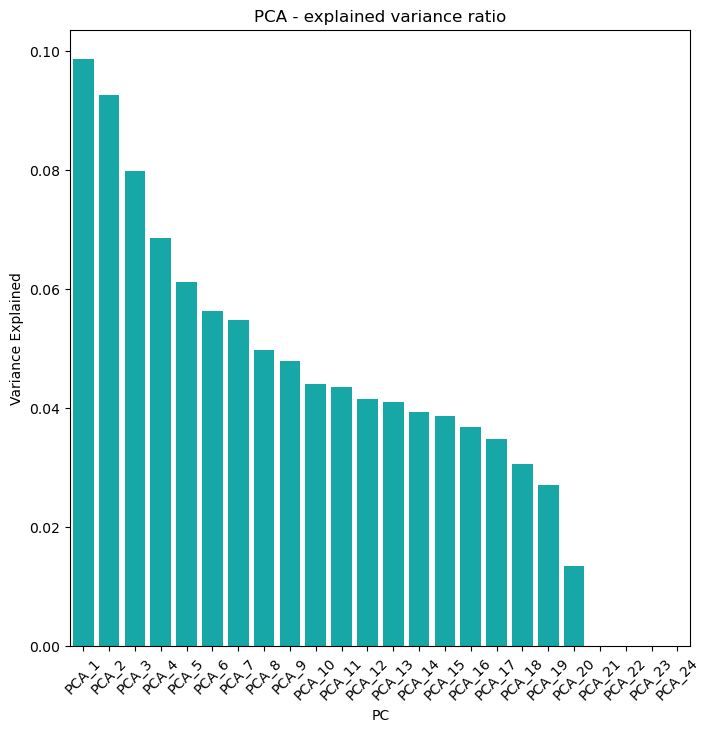

In [48]:
# Create a DataFrame for visulisation
pca_df = pd.DataFrame({'Variance Explained':pca.explained_variance_ratio_,
             'PC':df_pc.columns})

plt.figure(figsize=(8, 8))
plt.title('PCA - explained variance ratio')
# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.xticks(rotation=45)
plt.show()

#### Plot the cumulated (variance) information contribution

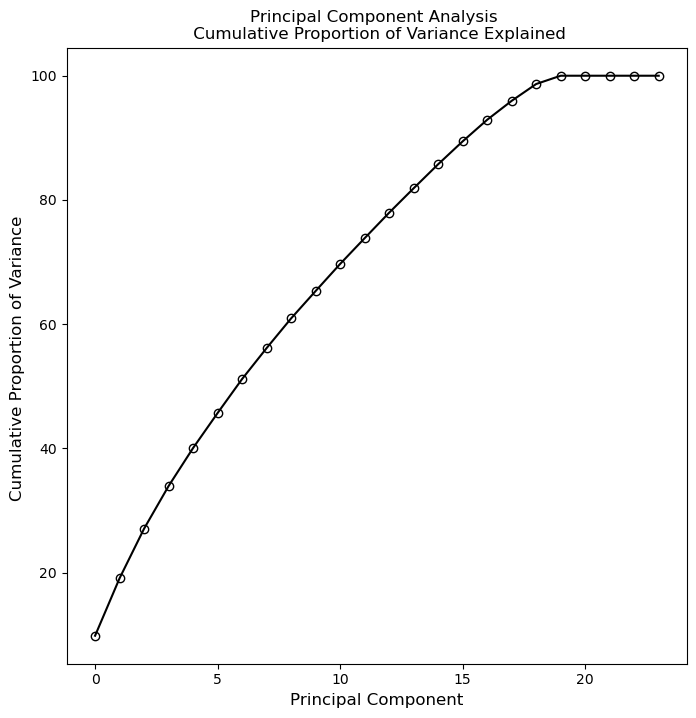

In [49]:
plt.figure(figsize=(8, 8))
# Instantiate, fit and transform

var = pca.explained_variance_ratio_

# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis \n Cumulative Proportion of Variance Explained',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance ",fontsize=12)
plt.show()

##### **Finding:**
From the plots above, we see that approximately **17 features** are needed to explain 90% of the variance in the dataset.
This gives us a good intuition of the number of features required in our model.

**For the minimun numbers of predictor to achieve the best performance, the number of predictors are 20. With coorelation analysis, we can choose the 20 predictors.**

### Assess models' performance after features selection

In [50]:
# Data preparation
X = df_credit_T.drop(['Purpose_car', 'Saving accounts_moderate', 'Purpose_furniture/equipment', 'Purpose_repairs', 'Purpose_domestic appliances'], axis=1)
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Modle LR has: 0.728 accuracy
Modle KNN has: 0.676 accuracy
Modle DT has: 0.684 accuracy
Modle NB has: 0.660 accuracy
Modle RF has: 0.732 accuracy
Modle SVM has: 0.728 accuracy
Modle XGB has: 0.740 accuracy


<Figure size 1100x600 with 0 Axes>

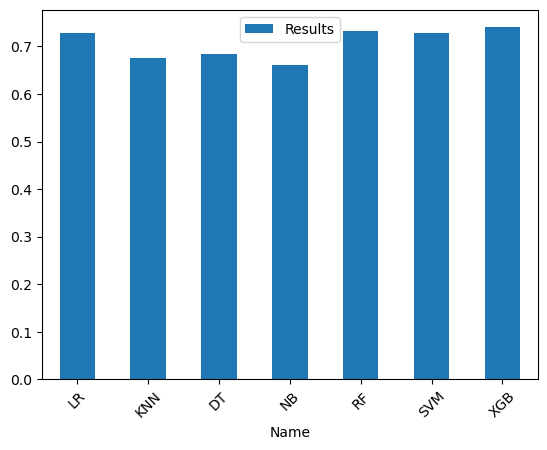

In [51]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        pre_results = model.predict(X_test)
        model_acc = accuracy_score(y_test, pre_results)
        names.append(name)
        results.append(model_acc)
        msg = "Modle %s has: %0.3f accuracy" % (name, model_acc)
        print(msg)      

#print(names)
#print(results) 
# boxplot algorithm comparison
results_df = pd.DataFrame({'Name':names, 'Results':results})
#print(results_df)
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')

results_df.plot.bar(x='Name',rot=45)

plt.show()

**Findings:**

We can see after select predictors the noice has been reduced, so all models' performace has been improved.

###  Fine tune RF Hyper Parameters with K-fold CV

In [52]:
# Data preparation
X = df_credit_T.drop(['Purpose_car', 'Saving accounts_moderate', 'Purpose_furniture/equipment', 'Purpose_repairs', 'Purpose_domestic appliances'], axis=1)
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

LR accurcy= 0.729  and sd = 0.038)
KNN accurcy= 0.708  and sd = 0.056)
DT accurcy= 0.636  and sd = 0.046)
NB accurcy= 0.688  and sd = 0.072)
RF accurcy= 0.719  and sd = 0.040)
SVM accurcy= 0.705  and sd = 0.049)
XGB accurcy= 0.713  and sd = 0.065)


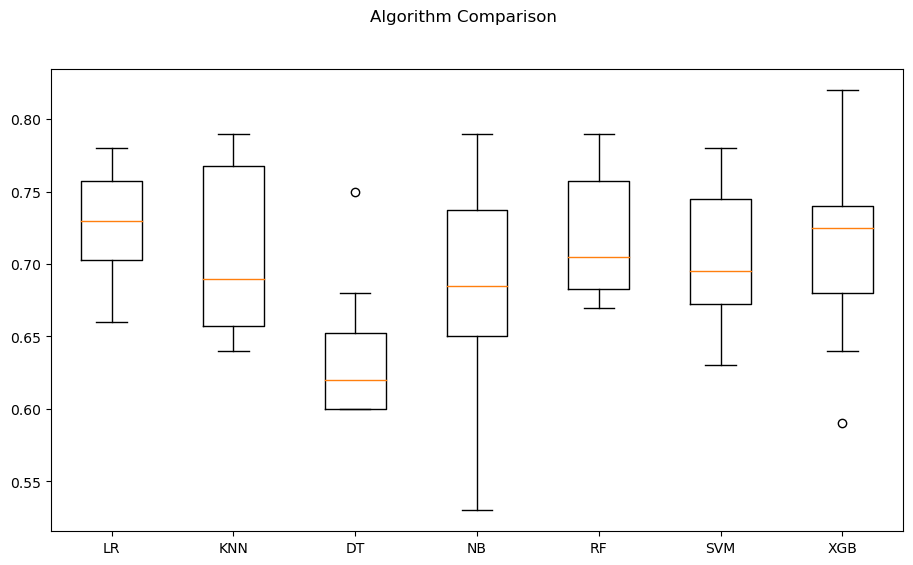

In [53]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
validates = []
names = []
scoring = 'accuracy'

for name, model in models:
        
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s accurcy= %0.3f  and sd = %0.3f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Finding:**

- All models' performance has been improved with K=10 fold CV. 

K-fold CV is useful to eliminate **overfitting**.

This can be confirmed by using **cross_validate**, which we can export the taining and the testing accuracy. The training accuracy is the mean accuracy on the X_train and y_train, and the test accuracy is the accuracy on X_test and y_test. That is the accuracy we used in the previouse evaluation. 

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Modle LR has: 0.743 train accuracy, 0.729 test accuracy
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Modle KNN has: 0.797 train accuracy, 0.708 test accuracy
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Modle DT has: 1.000 train accuracy, 0.635 test accuracy
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Modle NB has: 0.702 train accuracy, 0.688 test accuracy
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Modle RF has: 1.000 train accuracy, 0.723 test accuracy
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Modle SVM has: 0.748 train accuracy, 0.705 test accuracy
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
Modle XGB has: 0.999 train accuracy, 0.713 test accuracy


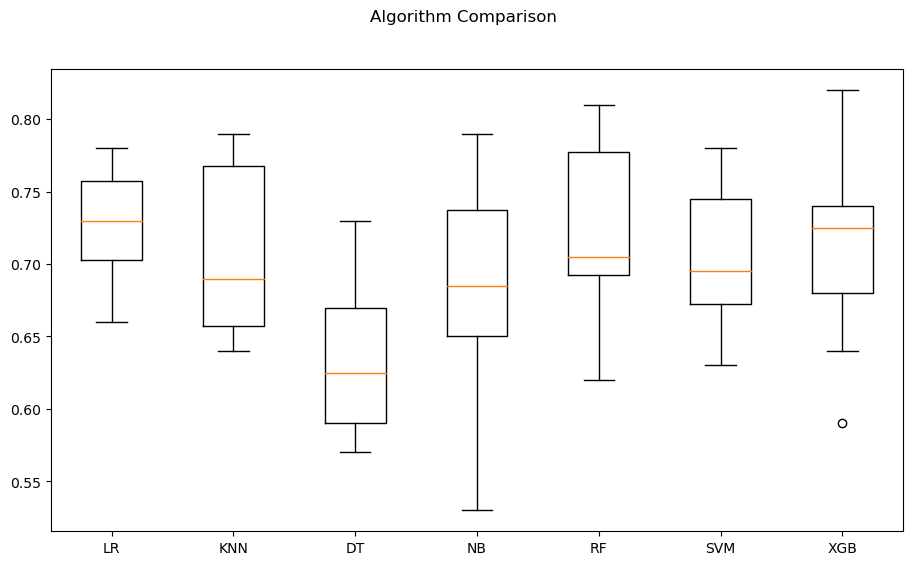

In [54]:
from sklearn.model_selection import cross_validate
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
validates = []
names = []
scoring = 'accuracy'

for name, model in models:
        
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        #cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        CV_results = cross_validate(model, X, y, cv=kfold,return_train_score=True)
        model_acc = CV_results['train_score']
        model_val = CV_results['test_score']
        validates.append(model_val) 
        names.append(name)
        results.append(model_acc)
        print(CV_results.keys())
        #print(model_acc)
        msg = "Modle %s has: %0.3f train accuracy, %0.3f test accuracy" % (name, model_acc.mean(), model_val.mean())
        print(msg)             
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(validates)
ax.set_xticklabels(names)
plt.show()

**Finding:**
 - We can see that all models has a slight higher accuracy on the training and a lower accuracy on test. It shows all our models has **"overfitting"**

In [55]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3, 5, 7, 10, None],
              "n_estimators":[100, 250, 500],
              "max_features": [15, 20]}

#Creating the classifier
model = RandomForestClassifier(random_state = 2)

grid_search = GridSearchCV(model, param_grid = param_grid, cv=5, scoring='accuracy', verbose=0)
# we use recall rather than accurate because in our applicaiton we care more of correct prediciton rate on positive results.
# verbose shows the msg to display:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [15, 20],
                         'n_estimators': [100, 250, 500]},
             scoring='accuracy')

In [56]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7266666666666667
{'max_depth': 5, 'max_features': 15, 'n_estimators': 100}


In [57]:
rf = RandomForestClassifier(max_depth=None, max_features=15, n_estimators=15)
#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=15, n_estimators=15)

In [58]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.74


[[158  20]
 [ 45  27]]


**Finding:**
with Grid search we can find the best hyperparameters.
Use them we can improve the model's performance.

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       178
           1       0.57      0.38      0.45        72

    accuracy                           0.74       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.72      0.74      0.72       250

